In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
import seaborn as sns
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor
import math
import datetime

In [2]:
import warnings

warnings.filterwarnings('ignore')

### Загрузка данных

In [3]:
test_data = pd.read_csv('test.csv')

In [4]:
test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [5]:
train_data = pd.read_csv('train.csv')

In [6]:
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


Объединяем в единый DataFrame

In [8]:
df = pd.concat([train_data, test_data], axis=0)

In [9]:
pd.isna(df['Price']).value_counts()

False    10000
True      5000
Name: Price, dtype: int64

### Очистка от выбросок и некорректных данных

In [10]:
# fig = sns.pairplot(train_data.select_dtypes(include=['float64', 'int64']))
# fig.savefig('pairplot.png')

In [11]:
df[df.HouseYear> 2020]

,DistrictId,Ecology_1,Ecology_2,Ecology_3,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,Id,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Shops_2,Social_1,Social_2,Social_3,Square
1497,109,0.136330,B,B,9,262.0,3,12.0,20052011,10814,9.0,20.239714,254084.534396,1.0,6,B,30,6141,10,37.265070
4189,147,0.319809,B,B,4,2857.0,5,9.0,4968,11607,5.0,28.360393,243028.603096,2.0,8,B,25,4756,16,44.791836


In [12]:
df.loc[df.HouseYear == 20052011,'HouseYear']=2011

In [13]:
df.loc[df.HouseYear == 4968,'HouseYear']=1977

In [14]:
df.HouseYear.mode()

0    1977
dtype: int64

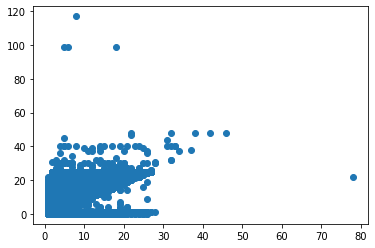

In [15]:
 plt.scatter(df.Floor, df.HouseFloor)

In [16]:
df.loc[df.Floor>70, 'Floor']=df.loc[df.Floor>70, 'HouseFloor']

In [17]:
df.loc[df.HouseFloor>80]

,DistrictId,Ecology_1,Ecology_2,Ecology_3,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,Id,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Shops_2,Social_1,Social_2,Social_3,Square
6131,5,0.150818,B,B,6.0,2643.0,4,99.0,1977,10806,1.0,48.709601,296127.115515,1.0,5,B,16,3433,4,51.944587
8599,74,0.075779,B,B,5.0,NaN,0,99.0,1977,9300,9.0,74.579809,243329.912579,2.0,2,B,6,1437,3,71.747869
8854,30,0.000078,B,B,8.0,1046.0,3,117.0,1977,78,1.0,66.811789,207248.370520,2.0,23,B,22,6398,141,65.773749
651,27,0.072158,B,B,18.0,NaN,0,99.0,1977,15864,9.0,47.098813,NaN,3.0,0,A,2,629,1,47.722835


In [18]:
df.loc[df.Floor == 18, 'HouseFloor'].median()

17.0

In [19]:
df.loc[df.HouseFloor>80, 'Floor']

6131     6.0
8599     5.0
8854     8.0
651     18.0
Name: Floor, dtype: float64

In [20]:
median_house_floor = df.groupby('Floor').HouseFloor.median()

In [21]:
df.loc[df.HouseFloor>80, 'HouseFloor'] = list(median_house_floor.loc[df.loc[df.HouseFloor>80, 'Floor']])

In [22]:
df.loc[df.Floor>df.HouseFloor]

,DistrictId,Ecology_1,Ecology_2,Ecology_3,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,Id,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Shops_2,Social_1,Social_2,Social_3,Square
7,74,0.075779,B,B,14.0,NaN,0,0.0,1977,11993,0.0,NaN,221244.156664,2.0,2,B,6,1437,3,80.312926
14,27,0.072158,B,B,5.0,NaN,0,4.0,1977,10953,1.0,52.408027,140647.565937,1.0,0,A,2,629,1,53.769097
16,27,0.051815,B,B,6.0,NaN,0,5.0,1983,2119,5.0,31.993964,117000.381287,2.0,0,B,5,1227,0,49.360648
21,27,0.211401,B,B,15.0,NaN,0,1.0,1977,11935,1.0,NaN,127200.026511,2.0,1,B,9,1892,0,64.711835
23,54,0.006076,B,B,2.0,645.0,6,0.0,1977,6641,0.0,NaN,571069.052600,3.0,6,B,30,5285,0,118.907612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,95,0.000699,B,B,6.0,4129.0,0,0.0,1977,4723,0.0,NaN,NaN,1.0,3,B,14,3369,24,45.542940
4989,39,0.428826,B,B,10.0,730.0,0,9.0,1972,2591,6.0,30.191691,NaN,2.0,2,B,25,5011,8,44.203592
4993,113,0.307467,B,A,6.0,325.0,2,5.0,1969,14562,5.0,27.058739,NaN,2.0,5,B,30,5048,9,46.627882
4997,12,0.090799,B,B,23.0,NaN,5,22.0,1989,5783,9.0,48.282625,NaN,3.0,15,B,74,19083,2,77.842178


In [23]:
median_house_floor_correct = df[df.Floor<=df.HouseFloor].groupby('Floor').HouseFloor.median()

In [24]:
df.loc[df.Floor>df.HouseFloor, 'HouseFloor'] = list(median_house_floor_correct.loc[df.loc[df.Floor>df.HouseFloor, 'Floor']])

In [25]:
df.loc[pd.isna(df.HouseFloor), 'HouseFloor'] = list(median_house_floor.loc[df.loc[pd.isna(df.HouseFloor), 'Floor']])

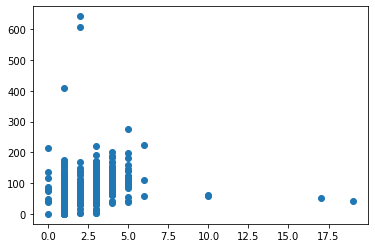

In [26]:
plt.scatter(df.Rooms, df.Square)

In [27]:
df.loc[df.Rooms>6]

,DistrictId,Ecology_1,Ecology_2,Ecology_3,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,Id,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Shops_2,Social_1,Social_2,Social_3,Square
377,57,0.090799,B,B,22.0,NaN,5,22.0,2002,5927,10.0,36.223072,317265.323792,10.0,15,B,74,19083,2,59.056975
1454,1,0.007122,B,B,17.0,NaN,0,17.0,2014,8491,7.0,21.779288,78364.616704,19.0,1,B,1,264,0,42.006046
8849,9,0.161532,B,B,3.0,30.0,2,9.0,1994,14865,10.0,38.420681,172329.270863,10.0,4,B,25,5648,1,60.871266
3398,111,0.093443,B,B,15.0,3300.0,2,17.0,1987,1435,8.0,32.528342,NaN,17.0,4,B,23,4635,5,52.866107


In [28]:
#df.loc[(df.Square >= 42) & (df.Square <= 61)]
#df.loc[df.Rooms==1].Square.describe()
df.loc[df.Rooms>6, 'Rooms'] = 2

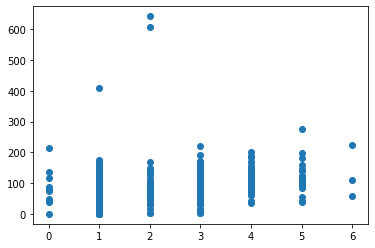

In [29]:
plt.scatter(df.Rooms, df.Square)

In [30]:
df.loc[df['Square'] > df['Square'].quantile(.999), 'Square' ].describe()

count     15.000000
mean     273.253282
std      153.545229
min      174.649522
25%      188.186089
50%      200.334539
75%      249.549486
max      641.065193
Name: Square, dtype: float64

In [31]:
df.loc[df['Square'] > df['Square'].quantile(.999), 'Square' ] = df['Square'].median()

In [32]:
df.loc[df['Square'] < df['Square'].quantile(.001), 'Square' ] = df['Square'].median()

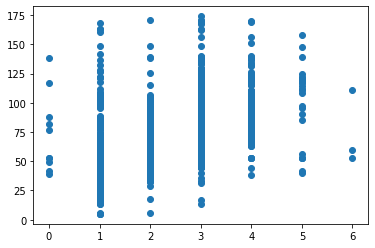

In [33]:
plt.scatter(df.Rooms, df.Square)

In [34]:
df.loc[df.Rooms==0]

,DistrictId,Ecology_1,Ecology_2,Ecology_3,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,Id,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Shops_2,Social_1,Social_2,Social_3,Square
1397,27,0.075424,B,B,4.0,NaN,0,9.0,2016,12638,0.0,136.215499,268394.744389,0.0,0,B,11,3097,0,138.427694
1981,27,0.211401,B,B,2.0,NaN,0,3.0,2008,7917,0.0,211.231125,302211.260887,0.0,1,B,9,1892,0,52.645757
2269,27,0.211401,B,B,13.0,NaN,0,17.0,1977,7317,0.0,NaN,98129.976788,0.0,1,B,9,1892,0,41.790881
3911,28,0.118537,B,B,16.0,1183.0,1,17.0,2015,770,0.0,NaN,217009.338463,0.0,0,B,30,6207,1,49.483501
4366,6,0.243205,B,B,4.0,540.0,0,9.0,1977,456,0.0,NaN,212864.799112,0.0,0,B,5,1564,0,81.491446
4853,27,0.017647,B,B,1.0,NaN,0,9.0,1977,3224,0.0,0.873147,126596.941798,0.0,0,B,2,469,0,52.644933
6149,88,0.127376,B,B,9.0,NaN,3,16.0,1982,3159,9.0,19.345131,158998.110646,0.0,9,B,43,8429,3,38.697117
8834,27,0.211401,B,B,5.0,NaN,0,15.0,1977,9443,0.0,85.125471,219281.918007,0.0,1,B,9,1892,0,87.762616
2406,58,0.437885,B,B,3.0,1084.0,0,3.0,1977,3343,0.0,113.692424,NaN,0.0,5,B,23,5735,3,116.824201
2524,27,0.017647,B,B,14.0,NaN,0,17.0,1977,10729,12.0,42.820796,NaN,0.0,0,B,2,469,0,76.345154


In [35]:
df.groupby('Rooms').Square.describe()#agg({'q25': quantile(0.25), 'q75':quantile(0.75)})

,count,mean,std,min,25%,50%,75%,max
Rooms,,,,,,,,
0.0,10.0,73.611330,33.385264,38.697117,50.273859,64.495456,86.194824,138.427694
1.0,5474.0,41.213173,9.409742,4.967143,36.643453,40.348619,43.609848,168.086347
2.0,5914.0,56.567686,10.839870,5.497061,47.917192,55.829078,63.517007,170.379494
3.0,3334.0,76.938312,15.409241,13.784865,66.010426,77.464118,83.109210,173.974480
4.0,240.0,94.623851,20.082452,37.920348,82.099791,96.777068,103.027443,170.016872
5.0,25.0,100.702851,33.488626,39.906082,85.313605,112.135525,120.330727,157.976101
6.0,3.0,74.270105,31.773460,52.645757,56.030045,59.414334,85.082280,110.750226


In [36]:
def rooms_by_square(square):
    if square < 45:
        return 1
    if square < 65:
        return 2
    if square < 82:
        return 3
    if square < 100:
        return 4
    if square < 120:
        return 5
    return 6

In [37]:
df.loc[df.Rooms==0, 'Rooms'] = df.loc[df.Rooms==0, 'Square'].apply(lambda x: rooms_by_square(x))

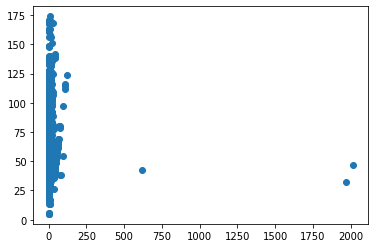

In [38]:
plt.scatter(df.KitchenSquare, df.Square)

In [39]:
df.loc[df.KitchenSquare>250, 'KitchenSquare']

1064    2014.0
8584    1970.0
1964     620.0
Name: KitchenSquare, dtype: float64

In [40]:
df.loc[df.KitchenSquare>60, 'KitchenSquare'] = np.mean(df.KitchenSquare/df.Square) * df.loc[df.KitchenSquare>60, 'Square']

In [41]:
df.loc[df.KitchenSquare==0, 'KitchenSquare'] = np.mean(df.KitchenSquare/df.Square) * df.loc[df.KitchenSquare==0, 'Square']

In [42]:
df.loc[df.KitchenSquare>df.Square, 'KitchenSquare'] = np.mean(df.KitchenSquare/df.Square) * df.loc[df.KitchenSquare>df.Square, 'Square']

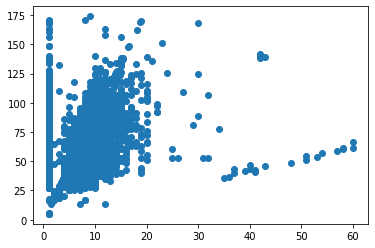

In [43]:
plt.scatter(df.KitchenSquare, df.Square)

In [44]:
np.mean(df.loc[np.isnan(df.LifeSquare)==False, 'LifeSquare'] /df.loc[np.isnan(df.LifeSquare)==False, 'Square'])

0.660613871025984

### Добавление новых признаков

In [45]:
df['LifeSquareNan'] = np.int64(np.isnan(df.LifeSquare))

In [46]:
df.loc[np.isnan(df.LifeSquare), 'LifeSquare']=\
    np.mean(df.loc[np.isnan(df.LifeSquare)==False, 'LifeSquare'] /df.loc[np.isnan(df.LifeSquare)==False, 'Square']) * \
    df.loc[np.isnan(df.LifeSquare), 'Square']

In [47]:
df['Healthcare1Nan'] = np.int64(np.isnan(df.Healthcare_1))

In [48]:
df['Ecology_2_int'] = df['Ecology_2'].replace({'A':0, 'B':1})
df['Ecology_3_int'] = df['Ecology_3'].replace({'A':0, 'B':1})
df['Shops_2_int'] = df['Shops_2'].replace({'A':0, 'B':1})

In [49]:
district_price = df.groupby('DistrictId').Price.mean()

In [50]:
district_price.columns = ['DistrictId', 'DistrictPrice']

In [51]:
district_price.head()

DistrictId
0    195295.590075
1    187805.401737
2    243688.618402
3    179905.016194
4    300096.687440
Name: Price, dtype: float64

In [52]:
df = df.merge(district_price, on='DistrictId', how='left')

In [53]:
df.rename(columns={'Price_y': 'DistrictPrice'} , inplace=True)

In [54]:
df.rename(columns={'Price_x': 'Price'} , inplace=True)

In [55]:
df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})

,DistrictId,Rooms,Price
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,0,4.0,NaN
4,1,1.0,146735.671740
...,...,...,...
720,209,1.0,140048.802277
721,209,3.0,NaN
722,210,2.0,NaN
723,211,2.0,NaN


In [56]:
district_room_price = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'DistrictRoomPrice'})

In [57]:
df = df.merge(district_room_price, on=['DistrictId', 'Rooms'], how='left')

In [58]:
df.loc[np.isnan(df.Healthcare_1), 'Healthcare_1'] = -1

In [59]:
df.loc[np.isnan(df.DistrictPrice), 'DistrictPrice'] = 0

In [60]:
df.loc[np.isnan(df.DistrictRoomPrice), 'DistrictRoomPrice'] = 0

In [61]:
df.loc[df.Square > 90, 'Square'] = df.loc[df.Square > 90, 'Square'].median()

In [62]:
df['Square'].apply(lambda x: min(math.floor(x/15), 6)).value_counts()

2    5067
3    4282
4    2947
5    1943
6     621
1     132
0       8
Name: Square, dtype: int64

Так как площадь один из наиболее влияющих паказателей, создаем для него укрупненные группы

In [63]:
df['Square_10'] = df['Square'].apply(lambda x: min(math.floor(x/10), 9))

In [64]:
df['Square_15'] = df['Square'].apply(lambda x: min(math.floor(x/15), 6))

### Расчет PriceByMean
По исходным данным определим среднюю цену единицы площади (SqPrice).
Усреднением определим среднюю цену единицы площади по району 
 (с учетом десятилетия года постройки - MeanSqPrice_HYear и без - MeanSqPrice) и 
 заполним этим показателем в том числе тестовые данные.
На основании средней цены ед.площади и площали квратиры определим стоимость квартиры 
как расчетную величину от средней по району (и десятилетию постройки).
Сделаем эту величину параметром подели - PriceByMean.


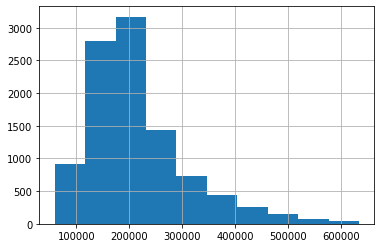

In [65]:
df.Price.hist()

In [66]:
(df.loc[np.isnan(df.Price)==False, 'Price']/df.loc[np.isnan(df.Price)==False, 'Square']).describe()

count    10000.000000
mean      3914.454794
std       1594.444820
min        693.050412
25%       2918.525328
50%       3913.801225
75%       4694.358839
max      75042.110444
dtype: float64

In [67]:
df['SqPrice'] = df.Price/df.Square

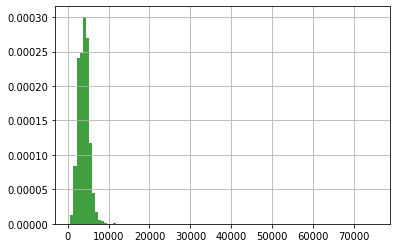

In [68]:
plt.hist(df.SqPrice, 100, density=True, facecolor='g', alpha=0.75)

plt.grid(True)
plt.show()

In [69]:
df.loc[df.SqPrice > df.SqPrice.quantile(.998), 'SqPrice'] = df.SqPrice.median()

In [70]:
df.loc[df.SqPrice < df.SqPrice.quantile(.002), 'SqPrice'] = df.SqPrice.median()

In [71]:
#df.drop(['SqPrice'], axis=1, inplace=True)

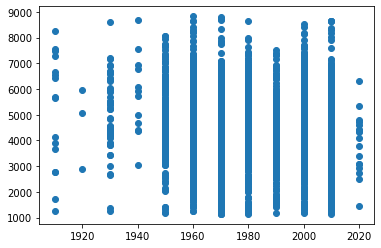

In [72]:
plt.scatter(df['HouseYear'].apply(lambda x: math.floor(x/10)*10), df.SqPrice)

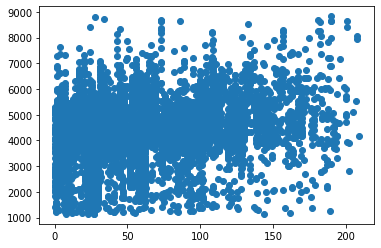

In [73]:
plt.scatter(df.DistrictId, df.SqPrice)

In [74]:
df['HouseYear10'] = df['HouseYear'].apply(lambda x: math.floor(x/10)*10)

In [75]:
district_mean_sqprice = df.groupby(['DistrictId', 'HouseYear10'], as_index=False).agg({'SqPrice':'median'})\
                       .rename(columns={'SqPrice':'MeanSqPrice_HYear'})

In [76]:
df = df.merge(district_mean_sqprice, on=['DistrictId', 'HouseYear10'], how='left')

In [77]:
district_mean_sqprice_d = df.groupby(['DistrictId'], as_index=False).agg({'SqPrice':'median'})\
                       .rename(columns={'SqPrice':'MeanSqPrice'})

In [78]:
df = df.merge(district_mean_sqprice_d, on=['DistrictId'], how='left')

In [79]:
df.loc[np.isnan(df.MeanSqPrice), 'MeanSqPrice'] = df.SqPrice.median()

In [80]:
df.loc[np.isnan(df.MeanSqPrice_HYear), 'MeanSqPrice_HYear'] = df.loc[np.isnan(df.MeanSqPrice_HYear), 'MeanSqPrice']

In [81]:
#df.drop(['PriceByMean'], axis=1, inplace=True)

In [82]:
df['PriceByMean'] = df.MeanSqPrice_HYear * df.Square

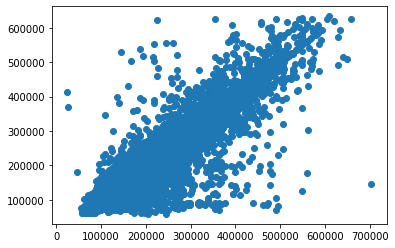

In [83]:
plt.scatter(df.loc[np.isnan(df.Price)==False, 'PriceByMean'], df.loc[np.isnan(df.Price)==False, 'Price'] )

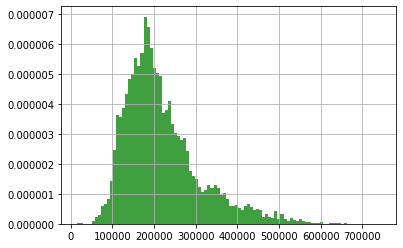

In [84]:
plt.hist(df.PriceByMean, 100, density=True, facecolor='g', alpha=0.75)

plt.grid(True)
plt.show()

In [85]:
pr_mode = df.loc[:, ['PriceByMean']].mode(axis=0, numeric_only=True).iloc[0,0]

pr_mode

247733.04265731134

In [86]:
df.loc[df.PriceByMean > df.PriceByMean.quantile(.995), 'PriceByMean'] = pr_mode


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,15000.0,50.693600,43.786257,0.000000,20.000000,37.000000,75.000000,212.000000
Ecology_1,15000.0,0.119196,0.119371,0.000000,0.017647,0.075424,0.195781,0.521867
Floor,15000.0,8.558067,5.293968,1.000000,4.000000,7.000000,12.000000,46.000000
Healthcare_1,15000.0,596.393067,938.030826,-1.000000,-1.000000,30.000000,990.000000,4849.000000
Helthcare_2,15000.0,1.319467,1.489012,0.000000,0.000000,1.000000,2.000000,6.000000
HouseFloor,15000.0,14.275933,5.687502,1.000000,9.000000,15.000000,17.000000,48.000000
HouseYear,15000.0,1984.709000,18.466387,1908.000000,1974.000000,1977.000000,2001.000000,2020.000000
Id,15000.0,8393.136933,4850.111673,0.000000,4188.750000,8378.500000,12594.250000,16798.000000
KitchenSquare,15000.0,6.239803,4.029853,1.000000,3.977402,6.000000,9.000000,60.000000
LifeSquare,15000.0,37.466459,63.484393,0.333490,24.806878,33.666240,45.236255,7480.592129


### Построение модели

In [88]:
def evaluate_preds(train_true_values, train_pred_values, val_true_values, val_pred_values):
    
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(val_true_values, val_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=val_pred_values, y=val_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    plt.show()

In [89]:
df.columns.tolist()

['DistrictId',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Floor',
 'Healthcare_1',
 'Helthcare_2',
 'HouseFloor',
 'HouseYear',
 'Id',
 'KitchenSquare',
 'LifeSquare',
 'Price',
 'Rooms',
 'Shops_1',
 'Shops_2',
 'Social_1',
 'Social_2',
 'Social_3',
 'Square',
 'LifeSquareNan',
 'Healthcare1Nan',
 'Ecology_2_int',
 'Ecology_3_int',
 'Shops_2_int',
 'DistrictPrice',
 'DistrictRoomPrice',
 'Square_10',
 'Square_15',
 'SqPrice',
 'HouseYear10',
 'MeanSqPrice_HYear',
 'MeanSqPrice',
 'PriceByMean']

In [90]:
feature_names = [
 'Ecology_1',
 'Floor',
 'Healthcare_1',
 'Helthcare_2',
 'HouseFloor',
 'HouseYear',
 'KitchenSquare',
 'LifeSquare',
 'Rooms',
 'Shops_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Square',
 'DistrictPrice',
 'DistrictRoomPrice',
 'Square_10',
 'Square_15',
 'HouseYear10',
 'MeanSqPrice_HYear',
 'MeanSqPrice',
 'PriceByMean'
]

target_name = 'Price'

In [91]:
X = df.loc[np.isnan(df.Price)==False, feature_names]
y = df.loc[np.isnan(df.Price)==False, target_name]

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [93]:
GBR2 = RandomForestRegressor(max_depth=10, max_features=7, n_estimators=400, random_state=42)
GBR2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Train R2:	0.907
Valid R2:	0.769


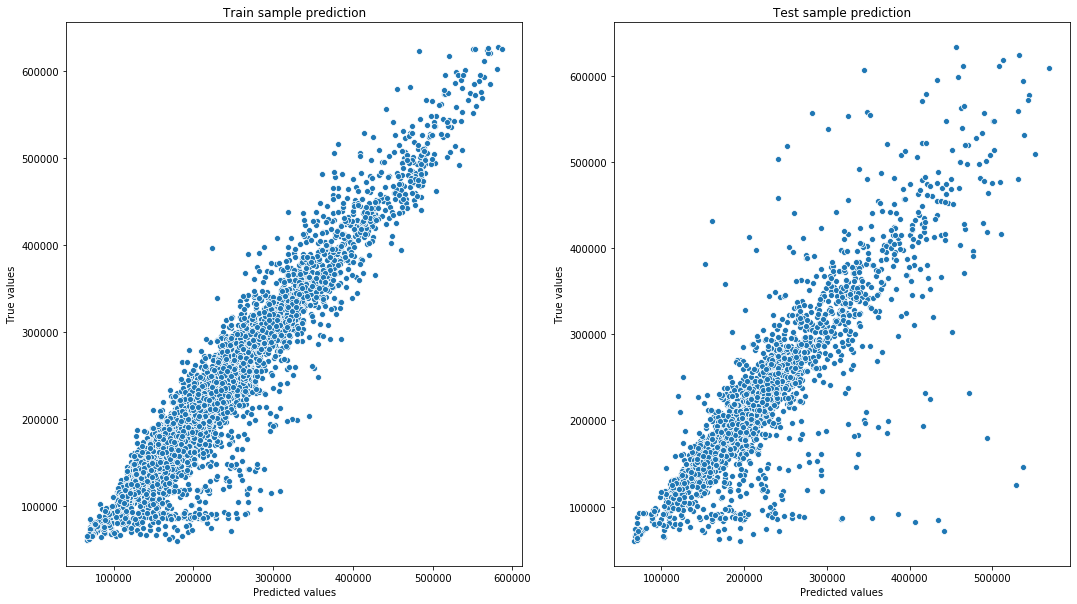

In [94]:
y_train_pred = GBR2.predict(X_train)
y_valid_pred = GBR2.predict(X_valid)

evaluate_preds(y_train, y_train_pred, y_valid, y_valid_pred)

### Предсказание на Test

In [95]:
X_test = df.loc[np.isnan(df.Price), feature_names + ['Id']]

X_test["Price"] = GBR2.predict(X_test[feature_names])

X_test.head()

,Ecology_1,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,KitchenSquare,LifeSquare,Rooms,Shops_1,...,DistrictPrice,DistrictRoomPrice,Square_10,Square_15,HouseYear10,MeanSqPrice_HYear,MeanSqPrice,PriceByMean,Id,Price
10000,0.310199,6.0,-1.0,0,14.0,1972,6.0,33.432782,2.0,0,...,162287.311374,166809.665642,4,3,1970,2509.104198,2949.975415,125160.749931,725,140319.031657
10001,0.075779,6.0,-1.0,0,14.0,1977,1.0,45.756220,2.0,2,...,210696.110719,243031.695525,6,4,1970,3268.306671,3347.534056,226373.324591,15856,221402.792064
10002,0.000000,2.0,4702.0,5,5.0,1909,12.0,15.948246,1.0,5,...,471966.746348,0.000000,1,0,1900,8001.266223,8001.266223,108799.765887,5480,148169.020821
10003,0.101872,22.0,-1.0,3,22.0,2007,9.0,51.940842,2.0,3,...,213625.761375,222227.584211,7,4,2000,4243.036976,4181.963615,309939.463875,15664,296090.737369
10004,0.072158,17.0,-1.0,0,17.0,2017,1.0,43.387569,1.0,0,...,156046.416277,118309.315585,4,3,2010,2760.234034,2761.266747,131185.948511,14275,139333.171767


In [96]:
y_test = X_test.loc[:, ['Id', 'Price']]

y_test.to_csv('Zharova_Natalija_predictions.csv', index=False)

https://www.kaggle.com/c/realestatepriceprediction/submit